## Polynomial Regression : Predicting salaries based on position

#### Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

#### Load Dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.shape

(10, 3)

#### Splitting data into dependant and independant features

In [4]:
X = df.iloc[:,1:2]
y = df.iloc[:,-1]

In [5]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


#### standardizing the Feature

In [6]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

#### Visualize raw dataset

Text(0, 0.5, 'Salary')

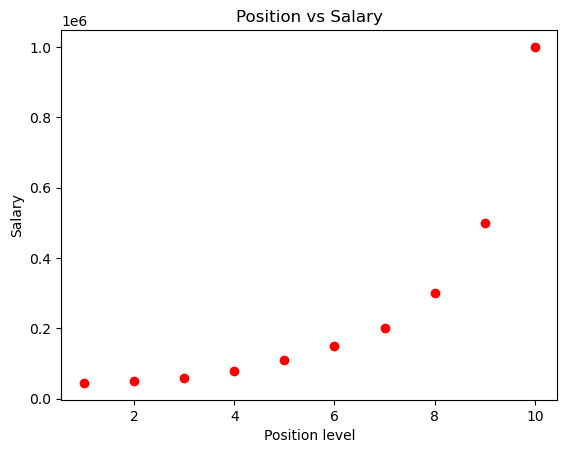

In [7]:
plt.scatter(X, y, color='red')
plt.title('Position vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary')

#### Fit Linear Regression (for complarison)

In [8]:
lr_model = LinearRegression()
lr_model.fit(X,y)
y_pred_lr = lr_model.predict(X)

#### Visualize linear regression result

Text(0, 0.5, 'Salary')

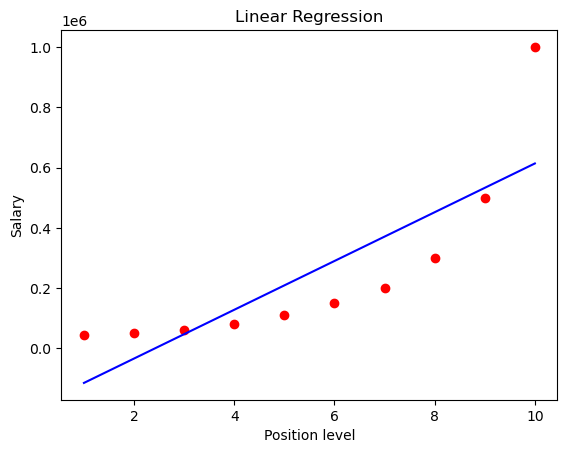

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_lr, color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [12]:
score = r2_score(y,y_pred_lr)
score

0.6690412331929895

##### NOTE : Linear regression is not suitable for the data set

#### Fit Polynomial Regression

In [13]:
poly_degree = 2
poly_model = PolynomialFeatures(degree = poly_degree)

# Transform the feature to polynomial features
X_poly = poly_model.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [14]:
# Fitting polynomial features into Linear regression model
lr_poly_model = LinearRegression()
lr_poly_model.fit(X_poly,y)

LinearRegression()

##### NOTE : In polynomial regression, we use linear regression but on a transformed features that includes polynomial terms.

#### Visualize polynomial regression result

In [15]:
y_pred_poly =lr_poly_model.predict(X_poly)

Text(0, 0.5, 'Salary')

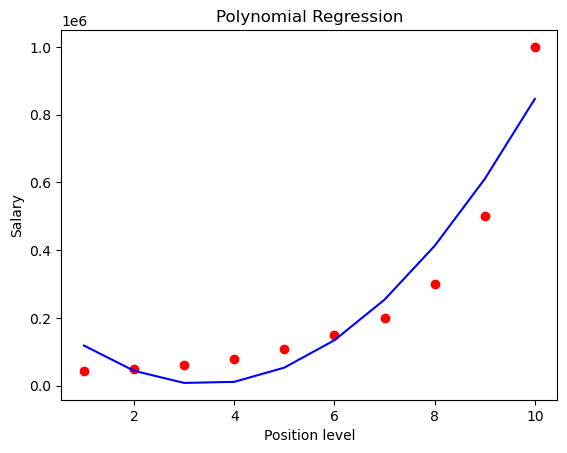

In [16]:
plt.scatter(X, y, color='red')  # Scatter plot of actual data
plt.plot(X, y_pred_poly, color='blue')  # Polynomial regression curve
plt.title(f'Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

#### Predicting with Polynomial Regression

In [17]:
# predict input for new level
new_level = 10
new_level_poly = poly_model.transform([[new_level]])
pred_salary = lr_poly_model.predict(new_level_poly)
pred_salary

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([846636.36363636])

In [18]:
poly_score = r2_score(y,y_pred_poly)
poly_score

0.9162082221443942

##### Conclusion : Accuracy is very high but A very high R² score can sometimes indicate overfitting, especially with polynomial models of high degree
for better generalization test model with lower degree .
Since our data set contain only 10 data points it's challenging to split it into training and test sets .
Use cross validation technique to evaluate your model’s performance on unseen data